In [1]:
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [2]:
orders=pd.read_excel('SuperStoreUS-2015.xlsx')


In [3]:
orders.head()


,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838


In [10]:
orders['div']=orders['Sales']/orders['Profit']
orders.head()


,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Sales per capita,div
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522,2.853070,2.853070
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,1.449275,1.449275
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,-3.924021,-3.924021
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,1.449275,1.449275
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838,-0.925094,-0.925094


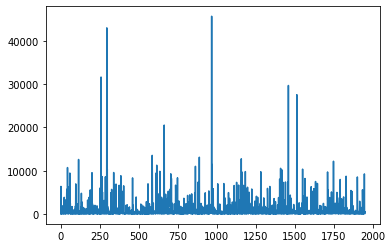

In [4]:
plt.plot(orders.Sales)
plt.show()

In [6]:
pyo.plot([{
   'x':orders.index,
   'y':orders.Sales  
    
}])

'temp-plot.html'

In [7]:
orders_sf=orders[['Sales','Profit','Region','City']]
orders_sf.head()

,Sales,Profit,Region,City
0,13.01,4.5600,West,Anacortes
1,6362.85,4390.3665,West,San Gabriel
2,211.15,-53.8096,East,Roselle
3,1164.45,803.4705,Central,Prior Lake
4,22.23,-24.0300,Central,Prior Lake


In [8]:
pyo.plot([{
   'x':orders_sf.index,
   'y':orders[col],
    'name':col
    
} for col in orders_sf.columns])

'temp-plot.html'

In [9]:
import plotly.graph_objs as go

In [10]:
data= [go.Scatter(
    
         x=orders_sf.Sales,
         y=orders_sf.Profit,
         mode ='markers',  
                  
       
    )]
#for squares  marker = dict(size =14, color ='rgb(120,150,180)',symbol='square', ) 

In [11]:
layout=go.Layout(
title='sales vs profit chart',
xaxis=dict(title='sales'),
yaxis=dict(title='Profit')
)

In [12]:
figure=go.Figure(data=data, layout=layout)


In [13]:
pyo.plot(figure)

'temp-plot.html'

In [14]:
import plotly.graph_objs as go

In [15]:
#BAR chart
order_priority=pd.pivot_table(orders,values='Sales',index='Order Priority')

In [16]:
order_priority

,Sales
Order Priority,
Critical,1140.731333
Critical,124.810000
High,793.083069
Low,952.581256
Medium,984.252154
Not Specified,1060.672273


In [17]:
data=[go.Bar(
       
             x=order_priority.index, y=order_priority.Sales, name='Avg sale by ship mode'
     )]
layout=go.Layout(title='Avg sale by ship mode')

In [18]:
fig=go.Figure(data=data, layout=layout)

In [19]:
pyo.plot(fig)

'temp-plot.html'

In [20]:
# FIFA_Line_chart
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [21]:
fifa=pd.read_excel('World_Cup_Matches.xlsx',0)
fifa.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,HomeGoals,AwayGoals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [22]:
fifa_hg=pd.pivot_table(fifa,values='HomeGoals',index='Year')  #home goals
fifa_hg.head()

,HomeGoals
Year,
1930,3.277778
1934,2.823529
1938,3.388889
1950,3.136364
1954,4.192308


In [23]:
#line Chart
data=[go.Scatter(
      x=fifa_hg.index,
      y=fifa_hg.HomeGoals,
      mode='lines',
      name='Average home goals by year'

)]


In [24]:
layout=go.Layout(title='Average home goals by year')

In [25]:
figure1=go.Figure(data=data, layout=layout)
#pyo.plot(figure1)
pyo.plot(figure1, filename='avggoalsfifa')

C:\Users\Kamini Gaikwad\Anaconda3\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `avggoalsfifa` didn't end with .html. Adding .html to the end of your file.



'avggoalsfifa.html'

In [26]:
#multiple line chart
fifa_hg1=pd.pivot_table(fifa,values=['HomeGoals','AwayGoals'],index='Year')  #home and away goals
fifa_hg1.head()

,AwayGoals,HomeGoals
Year,,
1930,0.611111,3.277778
1934,1.294118,2.823529
1938,1.277778,3.388889
1950,0.863636,3.136364
1954,1.192308,4.192308


In [43]:
#muliple Bar CHart
trace0=go.Bar(
     x=fifa_hg1.index,
     y=fifa_hg1.AwayGoals,
     
)
trace1=go.Bar(
     x=fifa_hg1.index,
     y=fifa_hg1.HomeGoals,
     
)

In [44]:
data=[trace0,trace1]

In [48]:
layout=go.Layout(title='homegoals and awaygoals Bar chart',barmode='stack')

In [49]:
figure=go.Figure(data=data,layout=layout)

In [50]:
pyo.plot(figure)

'temp-plot.html'

In [37]:
# multiple line chart

trace0=go.Scatter(
     x=fifa_hg1.index,
     y=fifa_hg1.AwayGoals,
     mode='lines',      #mode=makers shows dot plot with scate points or markers+lines
     name='AwayGoals'
)

trace1=go.Scatter(
     x=fifa_hg1.index,
     y=fifa_hg1.HomeGoals,
     mode='markers+lines',
     name='HomeGoals'
)

In [38]:
data=[trace0,trace1]

In [39]:
layout=go.Layout(title='Average home goals and away goals by year')

In [40]:
figure2=go.Figure(data=data, layout=layout)
pyo.plot(figure2,filename='homegoalandawaygoal')

'homegoalandawaygoal.html'

In [55]:
#combo trace BAR + LINE

trace0=go.Scatter(
     x=fifa_hg1.index,
     y=fifa_hg1.AwayGoals,
     mode='markers+lines',      #mode=makers shows dot plot with scate points or markers+lines
     name='AwayGoals'
)

trace1=go.Bar(
     x=fifa_hg1.index,
     y=fifa_hg1.HomeGoals,
     name='HomeGoals'
)

In [56]:
data=[trace0,trace1]

In [57]:
layout=go.Layout(title='Average home goals and away goals by year BAR+ LINE COMBO')

In [58]:
figure3=go.Figure(data=data, layout=layout)
pyo.plot(figure3)

'temp-plot.html'